In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train["Age"].median()

28.0

In [8]:
def prepare_data(df: pd.DataFrame) -> pd.DataFrame:
    # Clean age
    df["Age"] = df["Age"].fillna(train["Age"].median())
    # Clean Embarked
    df.loc[df["Embarked"] == "S", "Embarked"] = 0
    df.loc[df["Embarked"] == "C", "Embarked"] = 1
    df.loc[df["Embarked"] == "Q", "Embarked"] = 2
    print("Embarked Mode", train["Embarked"].mode()[0])
    df["Embarked"] = df["Embarked"].fillna(train["Embarked"].mode()[0])
    # Clean sex
    df.loc[df["Sex"] == "male", "Sex"] = 0
    df.loc[df["Sex"] == "female", "Sex"] = 1
    df["Sex"] = df["Sex"].fillna(train["Sex"].mode()[0])
    # Return result
    return np.array(df[["Pclass","Sex","Age","Embarked"]].values, dtype = float)

In [9]:
data = prepare_data(train)
label = np.array(train[["Survived"]].values, dtype = float)

Embarked Mode 0


In [10]:
def step_gradient(x, y, theta, r, predicted):
    return x.T.dot(y - predicted)*r + theta

In [11]:
def mean_square_loss(x, y, theta, predicted):
    diff = predicted - y
    return np.sum(diff*diff) / x.shape[0]

In [12]:
def linear_regression(x: np.array, y: np.array, r, epoch):
    x = np.concatenate((np.ones(len(x))[:, np.newaxis], x), axis=1)
    theta = np.random.rand(x.shape[1], 1) - 0.5
    losses = []
    for i in tqdm(range(epoch)):
        predicted = x.dot(theta)
        theta = step_gradient(x, y, theta, r, predicted)
        losses.append(mean_square_loss(x, y, theta, predicted))
    plt.plot(np.arange(len(losses)), np.array(losses))
    plt.show()
    print("MSE:", losses[-1])
    count = 0
    result = x.dot(theta)
    #print(result)
    for i in range(len(result)):
        if result[i, 0] >= 0.1:
            count += 1
    print(f"Accuracy: {count / y.shape[0]}")
    return theta

100%|██████████| 100000/100000 [00:01<00:00, 50830.08it/s]


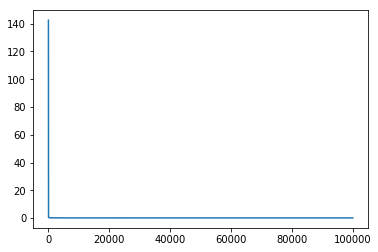

MSE: 0.14492575319931522
Accuracy: 0.7878787878787878
[[ 0.77595145]
 [-0.18830454]
 [ 0.49096938]
 [-0.00504691]
 [ 0.04912014]]


In [13]:
theta = linear_regression(
    x = data,
    y = label,
    r = 0.000002,
    epoch = 100000
)
print(theta)

In [14]:
# Using matrix inverse method
def linear_regression_matinv(x: np.array, y: np.array):
    x = np.concatenate((np.ones(len(x))[:, np.newaxis], x), axis=1)
    theta = np.linalg.pinv(x).dot(y)
    predicted = x.dot(theta)
    print("MSE:", mean_square_loss(x, y, theta, predicted))
    count = 0
    for i in range(len(predicted)):
        if predicted[i, 0] >= 0.1:
            count += 1
    print(f"Accuracy: {count / y.shape[0]}")
    return theta
theta_matinv = linear_regression_matinv(data, label)
theta_matinv

MSE: 0.1449257376613481
Accuracy: 0.7878787878787878


array([[ 0.77654442],
       [-0.18843944],
       [ 0.49086711],
       [-0.00505436],
       [ 0.04911346]])

In [21]:
theta_diff = theta - theta_matinv
print(theta_diff)
print('MSE of theta difference:', theta_diff.T.dot(theta_diff) / theta.shape[0])

[[-5.92969776e-04]
 [ 1.34901925e-04]
 [ 1.02266278e-04]
 [ 7.45373990e-06]
 [ 6.68782723e-06]]
MSE of theta difference: [[7.60740723e-08]]


In [16]:
predicted = np.array(np.round(sigmoid(test_data.dot(theta))), dtype = int)

NameError: name 'sigmoid' is not defined

In [15]:
test_data = prepare_data(test)
test_data = np.concatenate((np.ones(len(test_data))[:, np.newaxis], test_data), axis=1)

Embarked Mode 0


In [ ]:
test_result = pd.DataFrame()
test_result['PassengerId'] = test['PassengerId']
test_result['Survived'] = predicted
test_result

In [ ]:
test_result.to_csv("titanic_result.csv", index = False)

In [ ]:
theta